In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import os 
#from sklearn.linear_model import LinearRegression  #用於回歸
from sklearn.svm import SVR  #用於回歸
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [3]:
oil_price = pd.read_csv('data/oil_price.csv')  # oil price 

In [4]:
oil_price.head()  
#資料為每周一筆 
#不一定每周都有調整  
#越接近現在幾乎每周一筆

,adjust date,92 unleaded gasoline,95 unleaded gasoline,98 unleaded gasoline
0,1999/7/14,16.0,17.0,18.0
1,1999/8/11,16.4,17.4,18.4
2,1999/9/1,16.4,17.4,18.4
3,1999/11/10,16.8,17.8,18.8
4,1999/12/8,17.2,18.2,19.2


In [5]:
oil_price.shape

(566, 4)

Text(0, 0.5, 'oil price (NT$)')

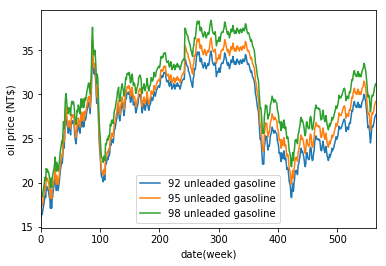

In [6]:
oil_price.plot()
plt.xlabel('date(week)')
plt.ylabel('oil price (NT$)')   #由圖可知三種無鉛汽油漲跌趨勢幾乎一致

In [7]:
# np.sum(np.sum(pd.isnull(oil_price)))   # 檢查 NAN 數量  # 0 
np.any(oil_price.isnull())    # 檢查 是否有 NAN 

False

三種無鉛汽油漲跌類似

因此取95無鉛為代表

用前10次調整價格預測下次的價格 (次數可以調整)


In [8]:
n = 10  #用前n次調整價格預測下次的價格

gas95 = oil_price['95 unleaded gasoline']

fit_data = gas95[n:len(gas95)]  #前面n天測試下一天  因此前n天沒有用

input_data = [] 

for i in range(0,len(fit_data)):    #將前n天存起來
    input_data.extend(list(gas95[i:i+n]))    

In [9]:
input_data = np.array(input_data).reshape(len(fit_data),n)  #將前n天轉成可用的格式

In [10]:
input_data.shape  

(556, 10)

In [11]:
svr = SVR(kernel = 'linear') #線性回歸  
svr.fit(input_data, fit_data)
result = svr.predict(input_data)
print("linear MSE  = {}".format(mean_squared_error(fit_data,result)))

linear MSE  = 0.3106715878150407


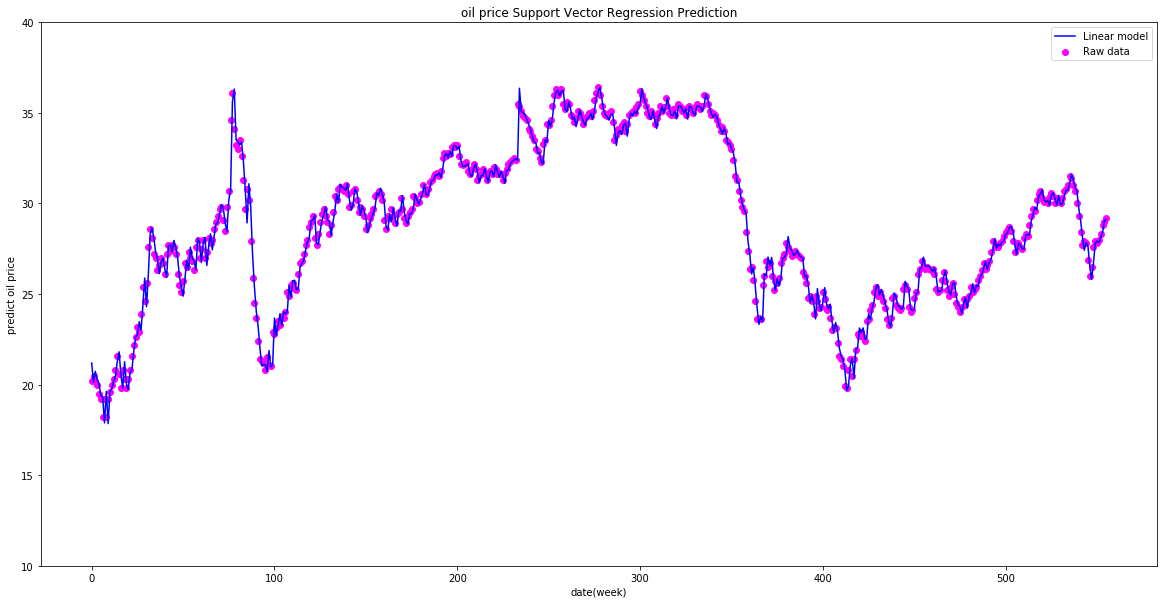

In [12]:
plt.figure(figsize=(20,10))
X = list(range(0,len(input_data)))

plt.scatter(X, fit_data, color='magenta', label='Raw data')
plt.plot(X, result, color='blue',  label='Linear model')

plt.ylim(10,40)
plt.xlabel('date(week)')
plt.ylabel('predict oil price')
plt.title('oil price Support Vector Regression Prediction')
plt.legend()
plt.show()

資料來源:整理自 

台灣中油股份有限公司-油品行銷事業部 -油品價目-汽、柴、燃油歷史價格
  
 網址 https://web.cpc.com.tw/division/mb/oil-more4.aspx

前為全部資料作為訓練資料

因此開始做資料切分  (訓練資料、測試資料)

In [13]:
a = np.linspace(0,5,9)

In [14]:
x_train,x_test,y_train,y_test = tts(input_data,fit_data,test_size = 0.3,random_state=7796)  #70%訓練資料 30%測試

In [15]:
svrl = SVR(kernel = 'linear') #線性回歸  
svrl.fit(x_train, y_train)
result = svrl.predict(x_train)
print("linear MSE  = {}".format(mean_squared_error(y_train,result)))

linear MSE  = 0.3275991411189581


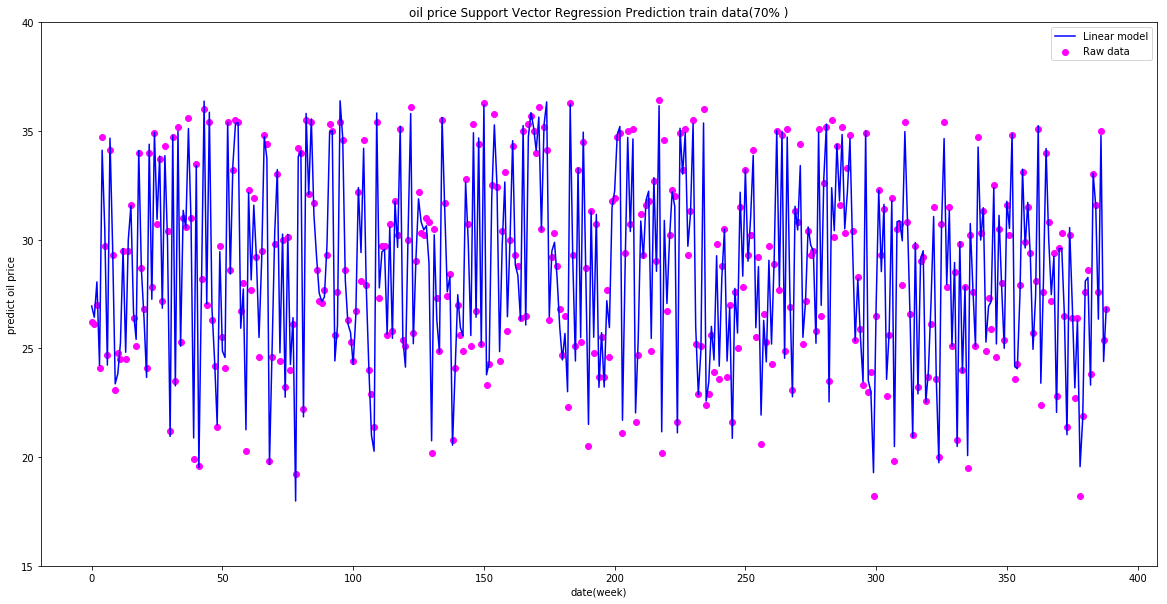

In [22]:
plt.figure(figsize=(20,10))
X = list(range(0,len(y_train)))
plt.scatter(X, y_train, color='magenta', label='Raw data')
plt.plot(X, result, color='blue',  label='Linear model')
plt.ylim(15,40)
plt.xlabel('date(week)')
plt.ylabel('predict oil price')
plt.title('oil price Support Vector Regression Prediction train data(70% )')
plt.legend()
plt.show()

In [17]:
result2 = svrl.predict(x_test)
print("linear MSE  = {}".format(mean_squared_error(y_test,result2)))

linear MSE  = 0.2774237960569212


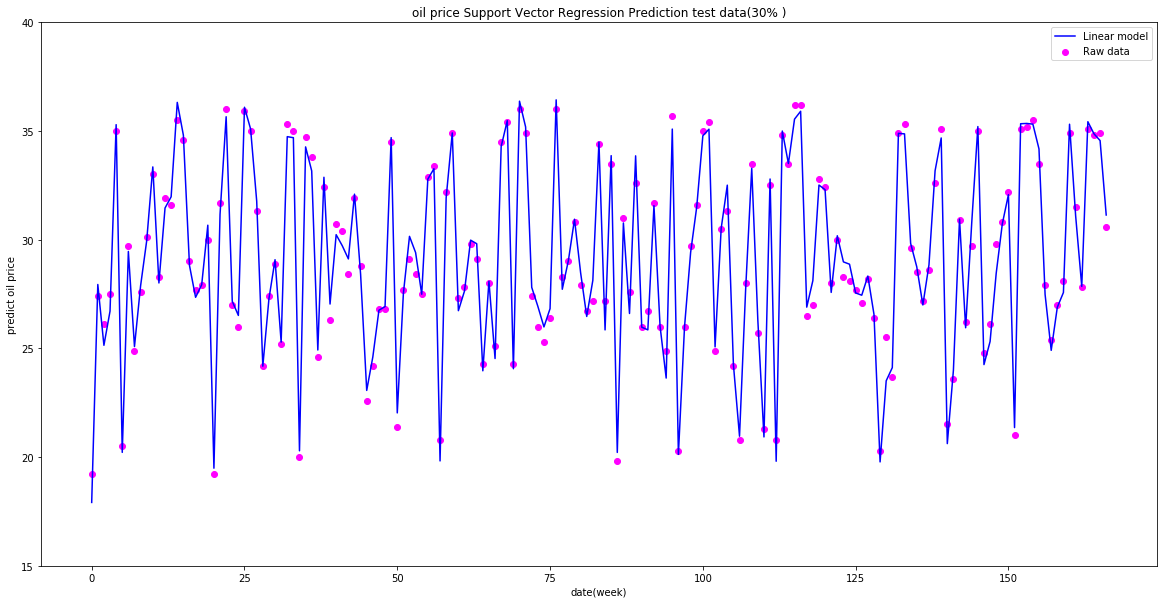

In [23]:
plt.figure(figsize=(20,10))
X = list(range(0,len(y_test)))
plt.scatter(X, y_test, color='magenta', label='Raw data')
plt.plot(X, result2, color='blue',  label='Linear model')
plt.ylim(15,40)
plt.xlabel('date(week)')
plt.ylabel('predict oil price')
plt.title('oil price Support Vector Regression Prediction test data(30% )')
plt.legend()
plt.show()